## Ad campaign performance Testing using A/B Hypothesis Testing

### Classic and sequential A/B testing analysis on "Ad campaign performance"

- The main objective of this project is to test if the ads that the advertising company runs resulted in a significant lift in brand "Lux" awareness. 

### Hypothesis of this Analysis:
#### 1. Null Hypothesis(Ho) -> "There is no difference in brand awareness between the exposed and control groups in the current case"

#### 2. Alternate Hypothesis(Ha) -> "There is difference in brand awareness between the exposed and control groups in the current case"

### Variables for our A/B Testing Analysis:
#### 1. A control group - users that were shown the dummy ad,
#### 2. A Exposed/experimental group - Users that were shown the Creative ad.

### Required: 
#### 1.2.1 Performing data exploration to count unique values of categorical variables, make histogram, relational, and other necessary plots to help understand the data.

- Importing Neccessary packages and Lading data

In [2]:
# Importing Neccessary packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [229]:
# Loading the Data
data=pd.read_csv('../data/AdSmartABdata.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [230]:
# Exploring Data types of a given data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


### The dataset has no missing Values, each column has 8077 entries

In [231]:
# Showing how many responded yes or no in both group
print(pd.crosstab(data['experiment'], data['yes']))
print("-----------------")
print(pd.crosstab(data['experiment'], data['no']))

yes            0    1
experiment           
control     3807  264
exposed     3698  308
-----------------
no             0    1
experiment           
control     3749  322
exposed     3657  349


### Counting Users who belong to Control and Exposed Groups

 control group has a total users of 4071
 exposed group has a total users of 4006


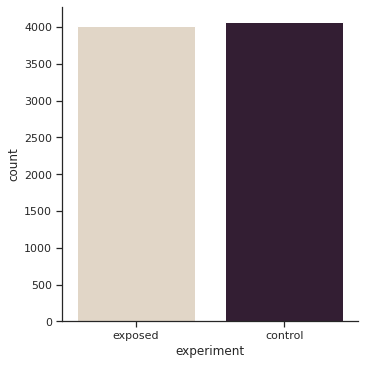

In [232]:
# Out of Total Users, how many belongs the control and Exposed
categories = ["control", "exposed"]
for category in categories:
    print(f" {category} group has a total users of {data[data.experiment == category].experiment.count()}")


sns.catplot(x="experiment", kind="count", palette="ch:.25", data=data)


The Groups contains Almost the same number of users

In [233]:
#  Plotting functions
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column, color=color, kde=True, height=4, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

### There are 4071 Control group users and 4006 exposed group users

### Counting the Users who responded and who doesn't

 Users that never Responded: 6834 
 Users that have  Ambigous Response - answered 1 in both 'yes', and 'no': 0
 Users that  Responded: 1243 which is 15.39 % of the total Uses


<ipython-input-234-f34fac6eb99c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_response = data[data.no ==0][data.yes ==0].auction_id.count()
<ipython-input-234-f34fac6eb99c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ambigous_response = data[data.no ==1][data.yes ==1].auction_id.count()


<AxesSubplot:ylabel='None'>

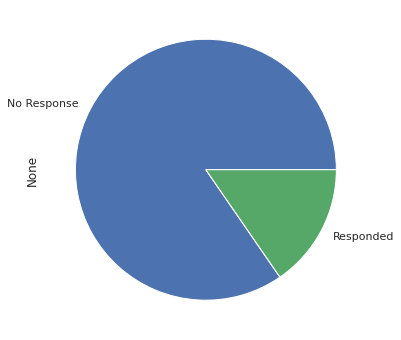

In [234]:
no_response = data[data.no ==0][data.yes ==0].auction_id.count()
ambigous_response = data[data.no ==1][data.yes ==1].auction_id.count()
total_users = data.auction_id.count()
users_responded = total_users-no_response
# f" There are {loaded_data.shape[0]} rows and {loaded_data.shape[1]} columns of Telecom Users Data"
print(f" Users that never Responded: {no_response} ")
print(f" Users that have  Ambigous Response - answered 1 in both 'yes', and 'no': {ambigous_response}")
print(f" Users that  Responded: {users_responded} which is {round((users_responded/total_users)*100,2)} % of the total Uses")

series = pd.Series([no_response, ambigous_response,users_responded], 
                   index=["No Response","Ambigous Response", "Responded"])
series.plot.pie(figsize=(6, 6))

### The User Responded to the Ad is 15.39% to the total Users

### Checking if there are same users in multiple rows

In [235]:
unique_users = data['auction_id'].unique()
print(len(unique_users))

8077


### Making Dataset that contains Users who Responded, Droping Users who didn't Respond and Saving as CSV

In [224]:
# index_to_drop = data[(data['yes']==0) & (data['no']==0)].index
# # # Delete these row indexes from dataFrame

# data.drop(index_to_drop , inplace=True)
# # print(index_to_drop)
# data.to_csv('../data/Resp_dataSet.csv', index=False)

In [236]:
#  Loading data with users response
resp_data=pd.read_csv('../data/Resp_dataSet.csv')
resp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   1243 non-null   object
 1   experiment   1243 non-null   object
 2   date         1243 non-null   object
 3   hour         1243 non-null   int64 
 4   device_make  1243 non-null   object
 5   platform_os  1243 non-null   int64 
 6   browser      1243 non-null   object
 7   yes          1243 non-null   int64 
 8   no           1243 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 87.5+ KB


In [241]:
# data.info()

### All Users are Uniques, there is no duplicates

### Exploration of Response against Date, time, device, and Browsers

['2020-07-10' '2020-07-07' '2020-07-05' '2020-07-03' '2020-07-09'
 '2020-07-04' '2020-07-06' '2020-07-08']
Users shown Ads against date, shown in First figure
Users who Responded to shown Ads against date, shown in second figure


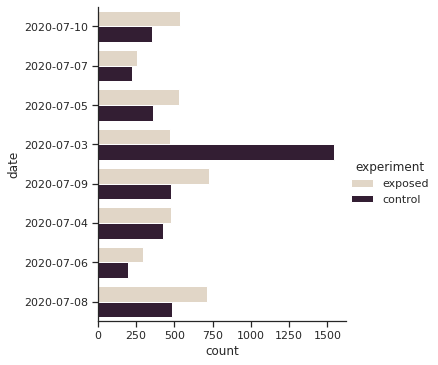

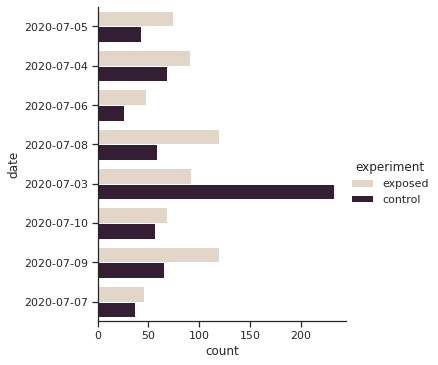

In [244]:
# Response Against Date
unique_date = data['date'].unique()
print(unique_date)
sns.set_theme(style="ticks", color_codes=True)
print("Users shown Ads against date, shown in First figure")
sns.catplot(y="date", kind="count", palette="ch:.25", hue="experiment",data=data)

print("Users who Responded to shown Ads against date, shown in second figure")
sns.catplot(y="date", kind="count", palette="ch:.25", hue="experiment",data=resp_data)

### There is no significant relationship between Response and the Date the user(s) were shown the Ads

### Data exploration against Time

In [ ]:
unique_date = data['date'].unique()
print(unique_date)
sns.set_theme(style="ticks", color_codes=True)
print("Users shown Ads against date, shown in First figure")
sns.catplot(y="date", kind="count", palette="ch:.25", hue="experiment",data=data)

print("Users who Responded to shown Ads against date, shown in second figure")
sns.catplot(y="date", kind="count", palette="ch:.25", hue="experiment",data=resp_data)